In [1]:
library(dplyr)
library(caret)
library(corrplot)
library(ROCR)
library(yardstick)



Attaching package: 'dplyr'


The following objects are masked from 'package:stats':

    filter, lag


The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union


Loading required package: lattice

Loading required package: ggplot2

corrplot 0.84 loaded

For binary classification, the first factor level is assumed to be the event.
Use the argument `event_level = "second"` to alter this as needed.


Attaching package: 'yardstick'


The following objects are masked from 'package:caret':

    precision, recall, sensitivity, specificity




In [2]:
# read training dataset
churn <- read.csv('churn-bigml-80.csv')

head(churn)

,State,Account.length,Area.code,International.plan,Voice.mail.plan,Number.vmail.messages,Total.day.minutes,Total.day.calls,Total.day.charge,Total.eve.minutes,Total.eve.calls,Total.eve.charge,Total.night.minutes,Total.night.calls,Total.night.charge,Total.intl.minutes,Total.intl.calls,Total.intl.charge,Customer.service.calls,Churn
,<chr>,<int>,<int>,<chr>,<chr>,<int>,<dbl>,<int>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<int>,<dbl>,<int>,<lgl>
1,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,FALSE
2,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,FALSE
3,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,FALSE
4,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,FALSE
5,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,FALSE
6,AL,118,510,Yes,No,0,223.4,98,37.98,220.6,101,18.75,203.9,118,9.18,6.3,6,1.70,0,FALSE


# EDA

In [3]:
names(churn)

[1] "State"                  "Account.length"         "Area.code"             
 [4] "International.plan"     "Voice.mail.plan"        "Number.vmail.messages" 
 [7] "Total.day.minutes"      "Total.day.calls"        "Total.day.charge"      
[10] "Total.eve.minutes"      "Total.eve.calls"        "Total.eve.charge"      
[13] "Total.night.minutes"    "Total.night.calls"      "Total.night.charge"    
[16] "Total.intl.minutes"     "Total.intl.calls"       "Total.intl.charge"     
[19] "Customer.service.calls" "Churn"

In [4]:
# look at structure of dataset
glimpse(churn)

Rows: 2,666
Columns: 20
$ State                  <chr> "KS", "OH", "NJ", "OH", "OK", "AL", "MA", "M...
$ Account.length         <int> 128, 107, 137, 84, 75, 118, 121, 147, 141, 7...
$ Area.code              <int> 415, 415, 415, 408, 415, 510, 510, 415, 415,...
$ International.plan     <chr> "No", "No", "No", "Yes", "Yes", "Yes", "No",...
$ Voice.mail.plan        <chr> "Yes", "Yes", "No", "No", "No", "No", "Yes",...
$ Number.vmail.messages  <int> 25, 26, 0, 0, 0, 0, 24, 0, 37, 0, 0, 0, 0, 2...
$ Total.day.minutes      <dbl> 265.1, 161.6, 243.4, 299.4, 166.7, 223.4, 21...
$ Total.day.calls        <int> 110, 123, 114, 71, 113, 98, 88, 79, 84, 127,...
$ Total.day.charge       <dbl> 45.07, 27.47, 41.38, 50.90, 28.34, 37.98, 37...
$ Total.eve.minutes      <dbl> 197.4, 195.5, 121.2, 61.9, 148.3, 220.6, 348...
$ Total.eve.calls        <int> 99, 103, 110, 88, 122, 101, 108, 94, 111, 14...
$ Total.eve.charge       <dbl> 16.78, 16.62, 10.30, 5.26, 12.61, 18.75, 29....
$ Total.night.minutes    <db

In [5]:
# look at variable stats
summary(churn)

    State           Account.length    Area.code     International.plan
 Length:2666        Min.   :  1.0   Min.   :408.0   Length:2666       
 Class :character   1st Qu.: 73.0   1st Qu.:408.0   Class :character  
 Mode  :character   Median :100.0   Median :415.0   Mode  :character  
                    Mean   :100.6   Mean   :437.4                     
                    3rd Qu.:127.0   3rd Qu.:510.0                     
                    Max.   :243.0   Max.   :510.0                     
 Voice.mail.plan    Number.vmail.messages Total.day.minutes Total.day.calls
 Length:2666        Min.   : 0.000        Min.   :  0.0     Min.   :  0.0  
 Class :character   1st Qu.: 0.000        1st Qu.:143.4     1st Qu.: 87.0  
 Mode  :character   Median : 0.000        Median :179.9     Median :101.0  
                    Mean   : 8.022        Mean   :179.5     Mean   :100.3  
                    3rd Qu.:19.000        3rd Qu.:215.9     3rd Qu.:114.0  
                    Max.   :50.000        Max. 

In [6]:
# look at variable stats
library(Hmisc)

describe(churn)

Loading required package: survival


Attaching package: 'survival'


The following object is masked from 'package:caret':

    cluster


Loading required package: Formula


Attaching package: 'Hmisc'


The following objects are masked from 'package:dplyr':

    src, summarize


The following objects are masked from 'package:base':

    format.pval, units




churn 

 20  Variables      2666  Observations
--------------------------------------------------------------------------------
State 
       n  missing distinct 
    2666        0       51 

lowest : AK AL AR AZ CA, highest: VT WA WI WV WY
--------------------------------------------------------------------------------
Account.length 
       n  missing distinct     Info     Mean      Gmd      .05      .10 
    2666        0      205        1    100.6    44.77       36       50 
     .25      .50      .75      .90      .95 
      73      100      127      151      166 

lowest :   1   2   3   4   5, highest: 217 221 224 225 243
--------------------------------------------------------------------------------
Area.code 
       n  missing distinct     Info     Mean      Gmd 
    2666        0        3    0.847    437.4    38.71 
                            
Value        408   415   510
Frequency    669  1318   679
Proportion 0.251 0.494 0.255
----------------------------------------------

In [7]:
# check for missing values
unlist(lapply(churn,function(x) sum(is.na(x))))

State         Account.length              Area.code 
                     0                      0                      0 
    International.plan        Voice.mail.plan  Number.vmail.messages 
                     0                      0                      0 
     Total.day.minutes        Total.day.calls       Total.day.charge 
                     0                      0                      0 
     Total.eve.minutes        Total.eve.calls       Total.eve.charge 
                     0                      0                      0 
   Total.night.minutes      Total.night.calls     Total.night.charge 
                     0                      0                      0 
    Total.intl.minutes       Total.intl.calls      Total.intl.charge 
                     0                      0                      0 
Customer.service.calls                  Churn 
                     0                      0

Warning message:
"Ignoring unknown parameters: binwidth, bins, pad"


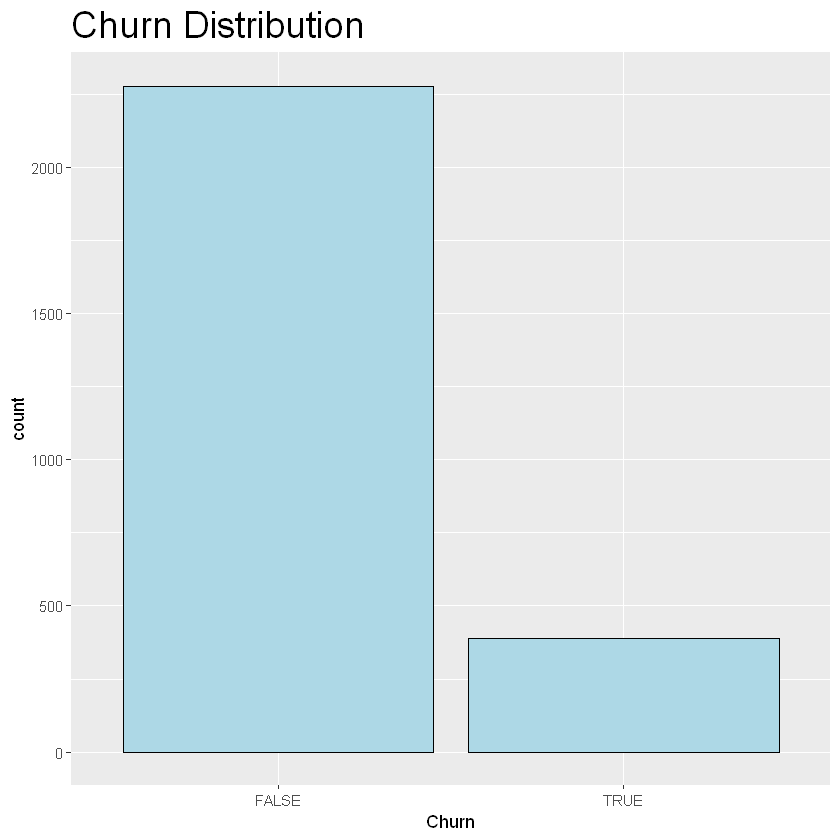

In [140]:
ggplot(churn, aes(Churn), color='Blue') + geom_histogram(stat='count', color="black", 
                                                         fill='light blue') + 
  ggtitle('Churn Distribution') +
  theme(plot.title = element_text(size=22))


`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



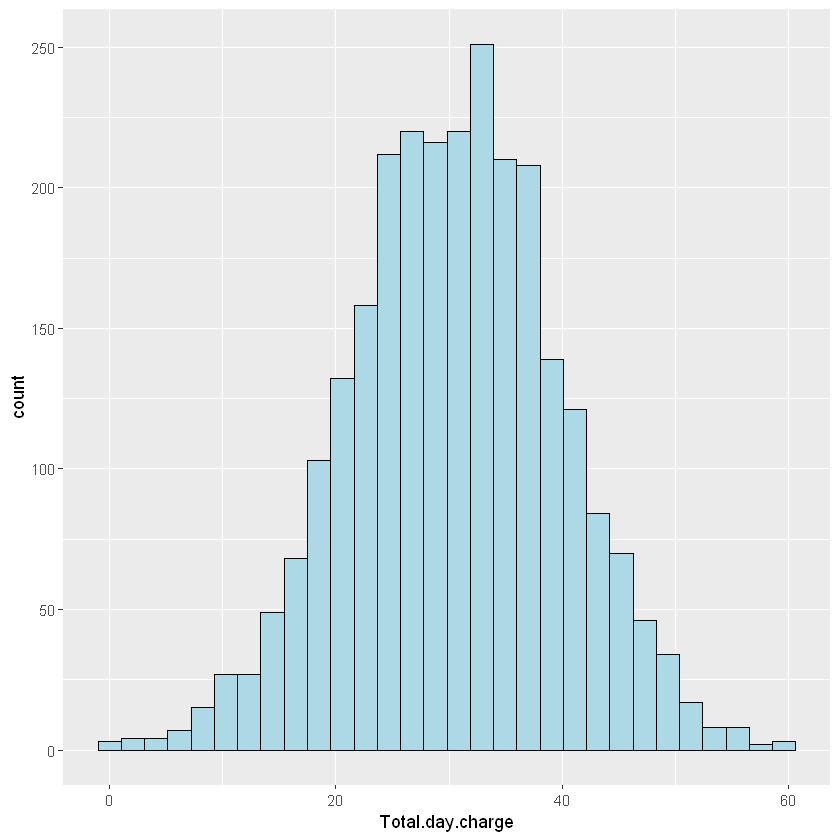

In [125]:
ggplot(churn, aes(Total.day.charge)) + geom_histogram(color='black', fill='light blue')

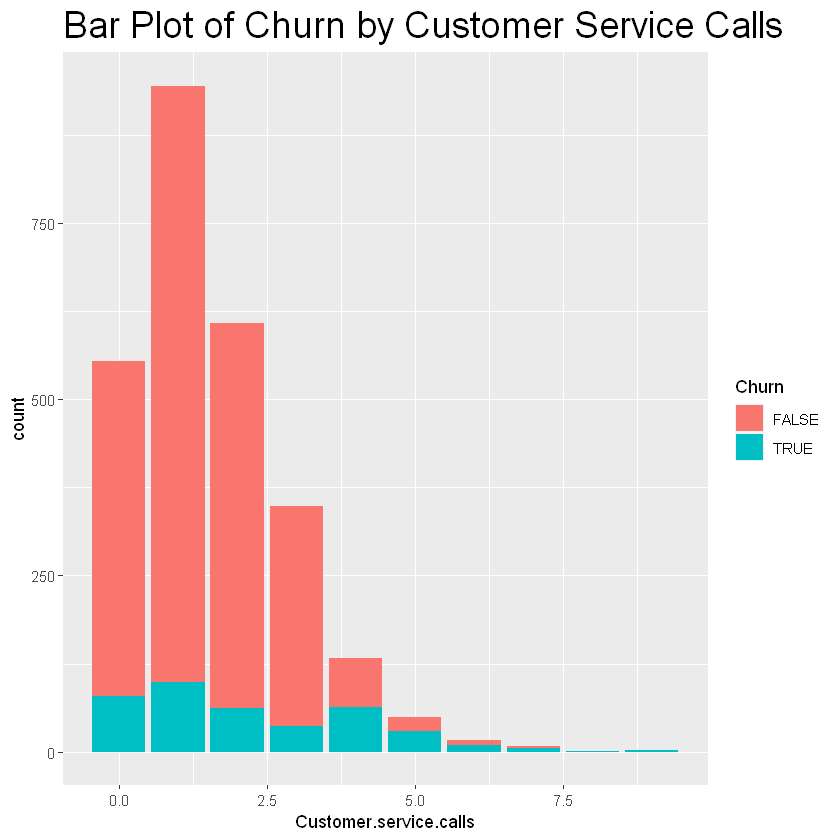

In [156]:
ggplot(churn, aes(Customer.service.calls, fill=Churn)) + geom_bar() +
  ggtitle('Bar Plot of Churn by Customer Service Calls') +
  theme(plot.title = element_text(size=22))



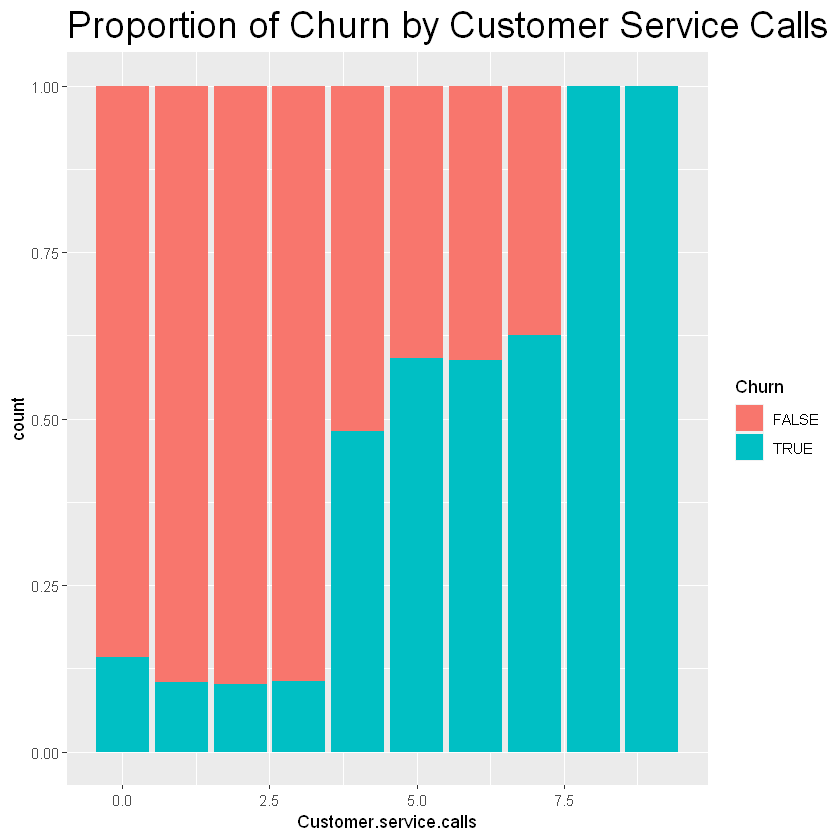

In [136]:
ggplot(churn, aes(Customer.service.calls, fill=Churn)) + 
  geom_bar(position='fill') +
  ggtitle('Proportion of Churn by Customer Service Calls by Churn') +
  theme(plot.title = element_text(size=22))

# churn increases as a proportion of number of calls increaes

In [15]:
x <- table(churn$Churn, churn$State)

x

       
        AK AL AR AZ CA CO CT DC DE FL GA HI IA ID IL IN KS KY LA MA MD ME MI MN
  FALSE 40 59 36 42 19 52 48 40 43 47 41 42 35 51 41 48 42 37 32 44 46 38 45 57
  TRUE   3  7 11  3  5  7 11  5  8  7  8  2  3  5  4  6 10  6  3  8 14 11 13 13
       
        MO MS MT NC ND NE NH NJ NM NV NY OH OK OR PA RI SC SD TN TX UT VA VT WA
  FALSE 46 37 43 47 40 41 34 36 40 48 56 56 45 55 28 45 38 43 36 39 52 63 51 38
  TRUE   5 11 10  9  4  4  9 14  4 13 12 10  7  7  8  3 11  6  5 16  8  4  6 10
       
        WI WV WY
  FALSE 57 81 58
  TRUE   4  7  8

In [16]:
y <- prop.table(x, 1)

y

       
                 AK          AL          AR          AZ          CA          CO
  FALSE 0.017559263 0.025899912 0.015803336 0.018437226 0.008340650 0.022827041
  TRUE  0.007731959 0.018041237 0.028350515 0.007731959 0.012886598 0.018041237
       
                 CT          DC          DE          FL          GA          HI
  FALSE 0.021071115 0.017559263 0.018876207 0.020632133 0.017998244 0.018437226
  TRUE  0.028350515 0.012886598 0.020618557 0.018041237 0.020618557 0.005154639
       
                 IA          ID          IL          IN          KS          KY
  FALSE 0.015364355 0.022388060 0.017998244 0.021071115 0.018437226 0.016242318
  TRUE  0.007731959 0.012886598 0.010309278 0.015463918 0.025773196 0.015463918
       
                 LA          MA          MD          ME          MI          MN
  FALSE 0.014047410 0.019315189 0.020193152 0.016681299 0.019754170 0.025021949
  TRUE  0.007731959 0.020618557 0.036082474 0.028350515 0.033505155 0.033505155
       


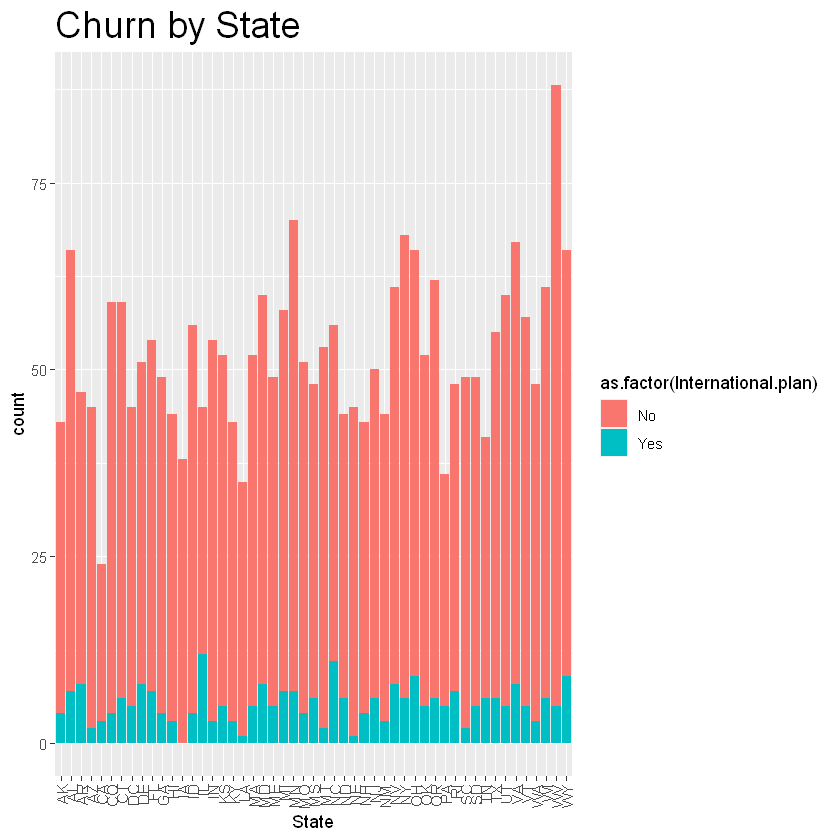

In [142]:
ggplot(churn, aes(State, Churn=TRUE, fill=as.factor(International.plan))) + geom_bar() +
  theme(axis.text.x = element_text(angle = 90, vjust = 0.5, hjust=1)) +
  ggtitle('Churn by State') +
  theme(plot.title = element_text(size=22))


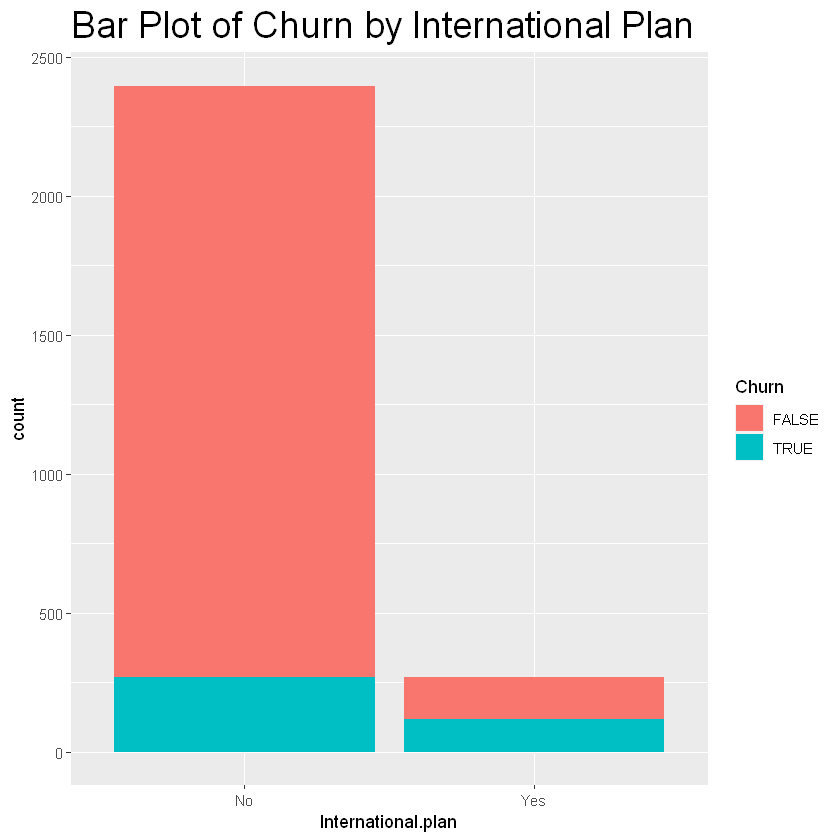

In [157]:
ggplot(churn, aes(International.plan, fill = Churn)) + geom_bar(position='stack') +
  ggtitle('Bar Plot of Churn by International Plan') +
  theme(plot.title = element_text(size=22))


#  higher percentage churn with international plan

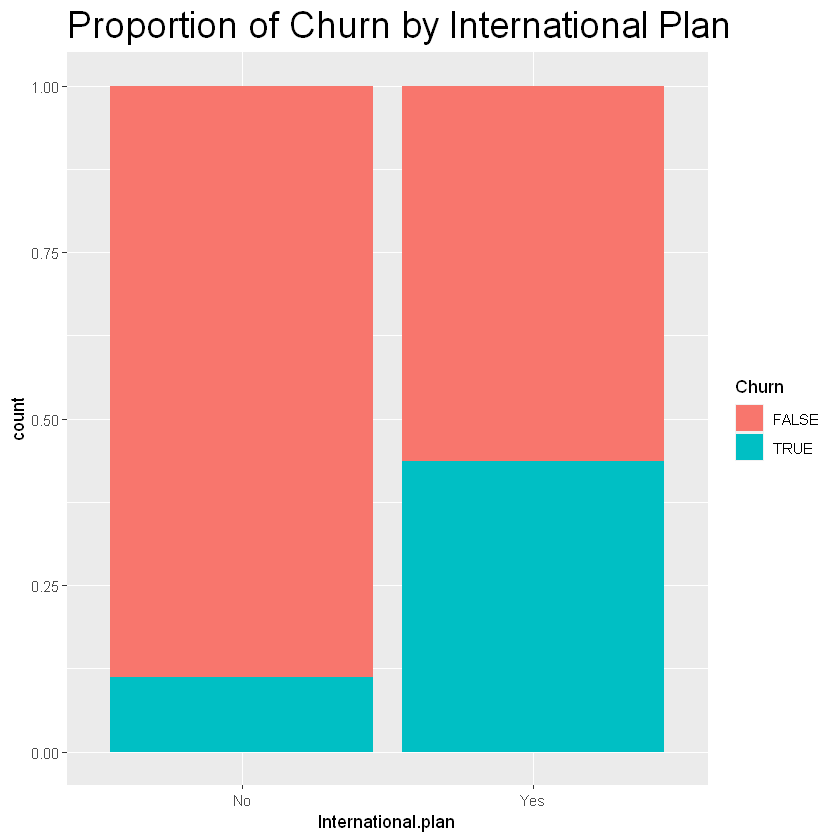

In [145]:
ggplot(churn, aes(International.plan, fill = Churn)) + geom_bar(position='fill') +
  ggtitle('Proportion of Churn by International Plan') +
  theme(plot.title = element_text(size=22))

# note: higher percentage churn with international plan

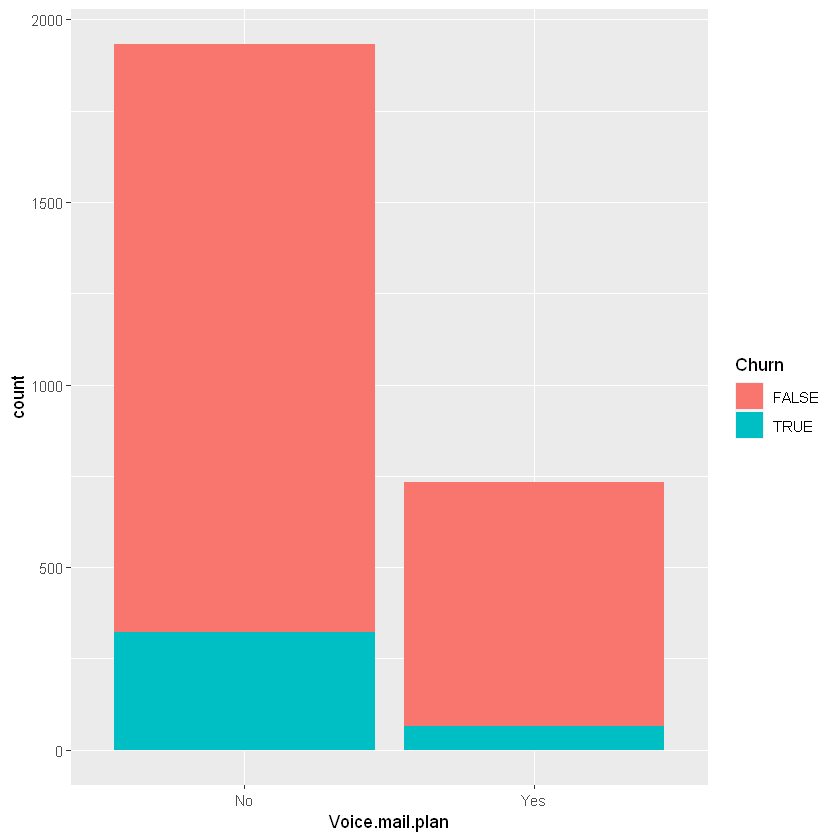

In [33]:
ggplot(churn, aes(Voice.mail.plan, fill = Churn)) + geom_bar(position='stack')

# customer without a voicemail plan tend to have a higher proportion of churn

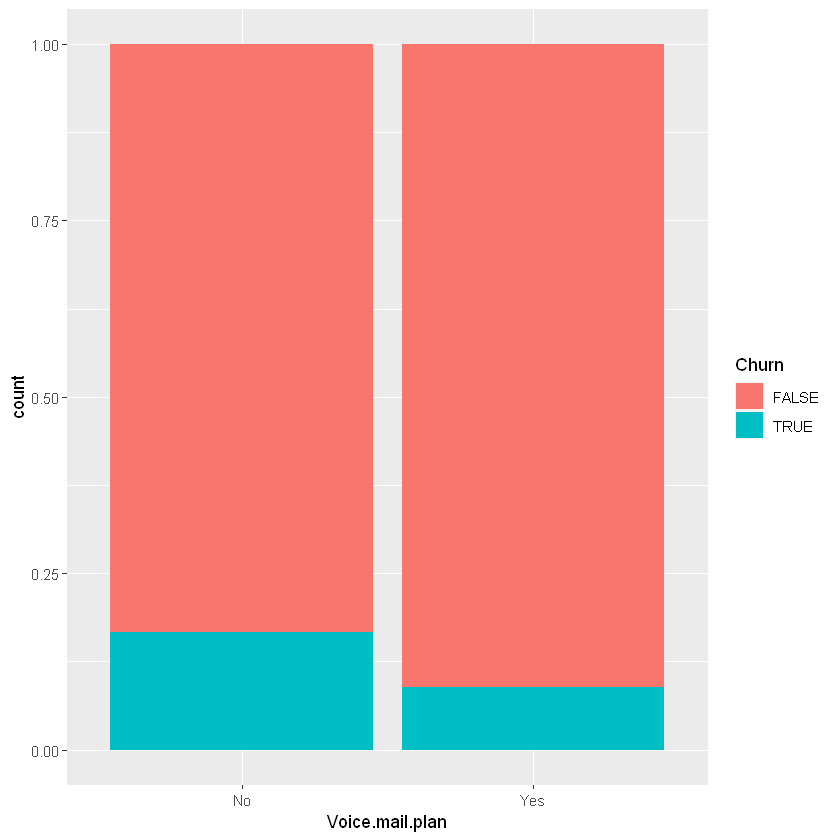

In [34]:
ggplot(churn, aes(Voice.mail.plan, fill = Churn)) + geom_bar(position='fill')

# customer without a voicemail plan tend to have a higher proportion of churn

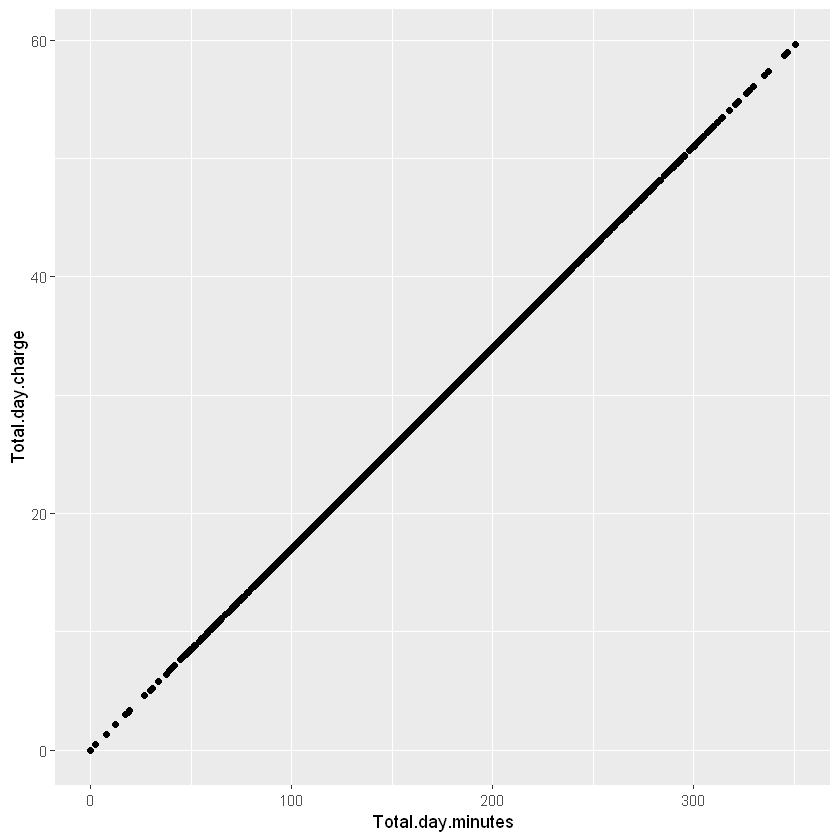

In [63]:
ggplot(churn, aes(Total.day.minutes, Total.day.charge)) + geom_point()

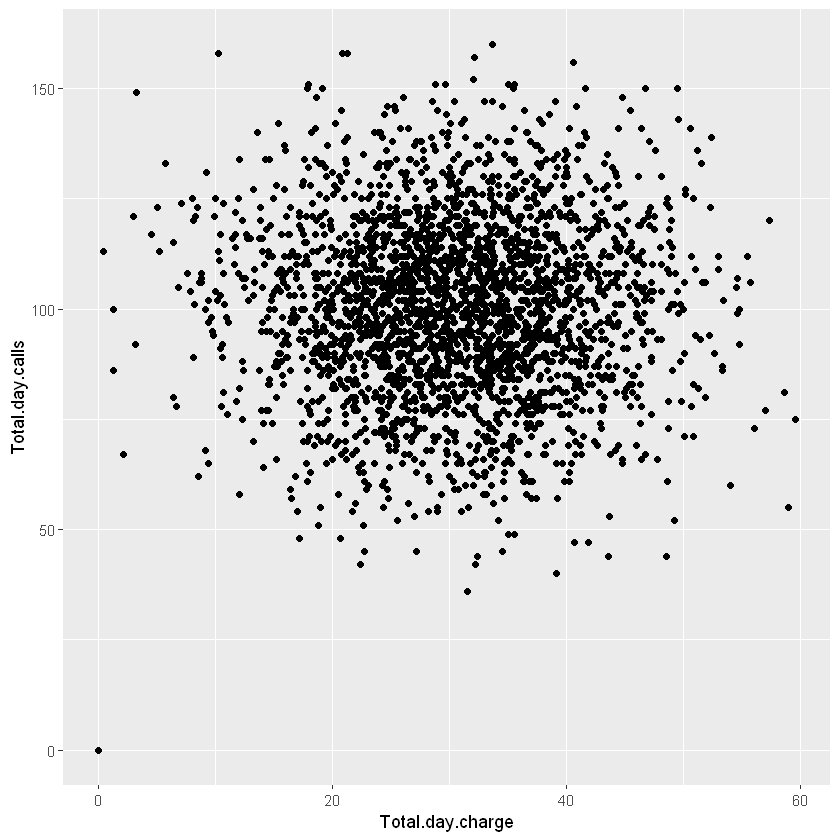

In [65]:
ggplot(churn, aes(Total.day.charge, Total.day.calls)) + geom_point()

In [35]:
# create separate datasets for numeric and character
churn_int<-churn[,unlist(lapply(churn,is.numeric))]
churn_char<-churn[,sapply(churn,is.character)]

In [36]:
# check for correlationsamong numeric fields
corr.num <- cor(churn_int, churn_int)

corr.num

,Account.length,Area.code,Number.vmail.messages,Total.day.minutes,Total.day.calls,Total.day.charge,Total.eve.minutes,Total.eve.calls,Total.eve.charge,Total.night.minutes,Total.night.calls,Total.night.charge,Total.intl.minutes,Total.intl.calls,Total.intl.charge,Customer.service.calls
Account.length,1.000000000,-0.0086203488,-0.0029959799,0.002847460,0.038861909,0.002843487,-0.0159227511,0.0185517188,-0.0159093139,-0.0089936038,-0.0240072954,-0.0089989318,0.011369014,0.017627003,0.011383356,0.002454845
Area.code,-0.008620349,1.0000000000,-0.0005837539,-0.023133543,-0.009628989,-0.023129789,0.0006793495,-0.0186021358,0.0007065587,-0.0033531433,0.0114551859,-0.0033820003,-0.013418347,-0.027423399,-0.013534127,0.034442452
Number.vmail.messages,-0.002995980,-0.0005837539,1.0000000000,0.019027036,-0.009622044,0.019027448,0.0114010658,0.0051308111,0.0114182234,-0.0002239232,0.0081239848,-0.0002290320,-0.004155595,0.027012571,-0.004135565,-0.018786700
Total.day.minutes,0.002847460,-0.0231335433,0.0190270356,1.000000000,0.016780301,0.999999952,0.0039986267,0.0090590291,0.0039924780,0.0134909530,0.0150537753,0.0134637914,-0.011041973,0.005686664,-0.010934027,-0.024543145
Total.day.calls,0.038861909,-0.0096289887,-0.0096220443,0.016780301,1.000000000,0.016786841,-0.0260025557,0.0064726797,-0.0260056409,0.0089859082,-0.0167758453,0.0089723379,0.031035828,0.006928337,0.031133456,-0.011944648
Total.day.charge,0.002843487,-0.0231297893,0.0190274476,0.999999952,0.016786841,1.000000000,0.0040083313,0.0090564374,0.0040021854,0.0134949311,0.0150572855,0.0134677588,-0.011046118,0.005688190,-0.010938194,-0.024547884
Total.eve.minutes,-0.015922751,0.0006793495,0.0114010658,0.003998627,-0.026002556,0.004008331,1.0000000000,-0.0076537987,0.9999997812,-0.0134140744,0.0090173929,-0.0134496195,-0.006914656,0.002160451,-0.006947487,-0.013192226
Total.eve.calls,0.018551719,-0.0186021358,0.0051308111,0.009059029,0.006472680,0.009056437,-0.0076537987,1.0000000000,-0.0076418806,-0.0001751710,0.0007967658,-0.0001349522,0.011011763,0.003709544,0.010999766,0.001058203
Total.eve.charge,-0.015909314,0.0007065587,0.0114182234,0.003992478,-0.026005641,0.004002185,0.9999997812,-0.0076418806,1.0000000000,-0.0134280257,0.0090297745,-0.0134635697,-0.006922572,0.002169484,-0.006955434,-0.013196020
Total.night.minutes,-0.008993604,-0.0033531433,-0.0002239232,0.013490953,0.008985908,0.013494931,-0.0134140744,-0.0001751710,-0.0134280257,1.0000000000,0.0127361002,0.9999992252,-0.008607444,-0.001110128,-0.008509762,0.005236360


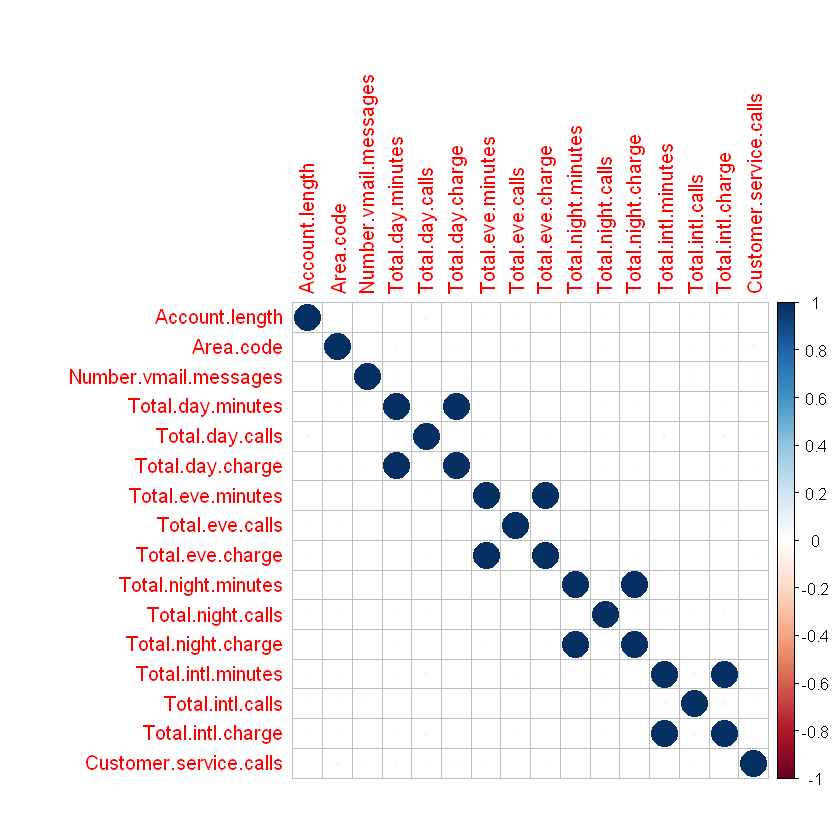

In [148]:
# create correlation plots
corrplot(cor(churn_int))

In [38]:
# check for correlations with target variable
correlations <- cor(churn_int, churn$Churn)

correlations


Account.length,0.017728035
Area.code,0.001018870
Number.vmail.messages,-0.086474143
Total.day.minutes,0.195687926
Total.day.calls,0.018290323
Total.day.charge,0.195688930
Total.eve.minutes,0.072906268
Total.eve.calls,-0.001539166
Total.eve.charge,0.072893269
Total.night.minutes,0.033639093
Total.night.calls,0.012261954


In [89]:
as.data.frame(correlations) %>%
  filter(V1 > 0.05) %>%
  arrange(desc(V1))


,V1
,<dbl>
Customer.service.calls,0.20259025
Total.day.charge,0.19568893
Total.day.minutes,0.19568793
Total.intl.charge,0.08621612
Total.intl.minutes,0.08620377
Total.eve.minutes,0.07290627
Total.eve.charge,0.07289327


In [39]:
# pairs(iris[,1:4], pch = 19)

# pairs(churn_int)

# MODELING

In [40]:
# logistic regression model
lr.model <- glm(Churn ~ International.plan + Voice.mail.plan + Total.day.charge +
   Total.eve.charge + Total.night.charge + Total.intl.calls + Customer.service.calls +
   Total.intl.charge, data = churn, family = 'binomial')



In [41]:
lr.model


Call:  glm(formula = Churn ~ International.plan + Voice.mail.plan + 
    Total.day.charge + Total.eve.charge + Total.night.charge + 
    Total.intl.calls + Customer.service.calls + Total.intl.charge, 
    family = "binomial", data = churn)

Coefficients:
           (Intercept)   International.planYes      Voice.mail.planYes  
              -7.50086                 2.10091                -0.89955  
      Total.day.charge        Total.eve.charge      Total.night.charge  
               0.07455                 0.06572                 0.06098  
      Total.intl.calls  Customer.service.calls       Total.intl.charge  
              -0.11876                 0.50635                 0.37471  

Degrees of Freedom: 2665 Total (i.e. Null);  2657 Residual
Null Deviance:	    2212 
Residual Deviance: 1736 	AIC: 1754

# RESULTS

In [42]:
churn$Has.churned <-case_when(churn$Churn==TRUE~1,
                      churn$Churn==FALSE~0)

# Get the actual responses from the dataset
actual.response <- churn$Has.churned
#length(actual.response)

# Get the "most likely" predicted responses from the model
predicted.response <- round(fitted(lr.model))

# Create a table of counts
outcomes <- table(predicted.response, actual.response)

outcomes

                  actual.response
predicted.response    0    1
                 0 2216  299
                 1   62   89

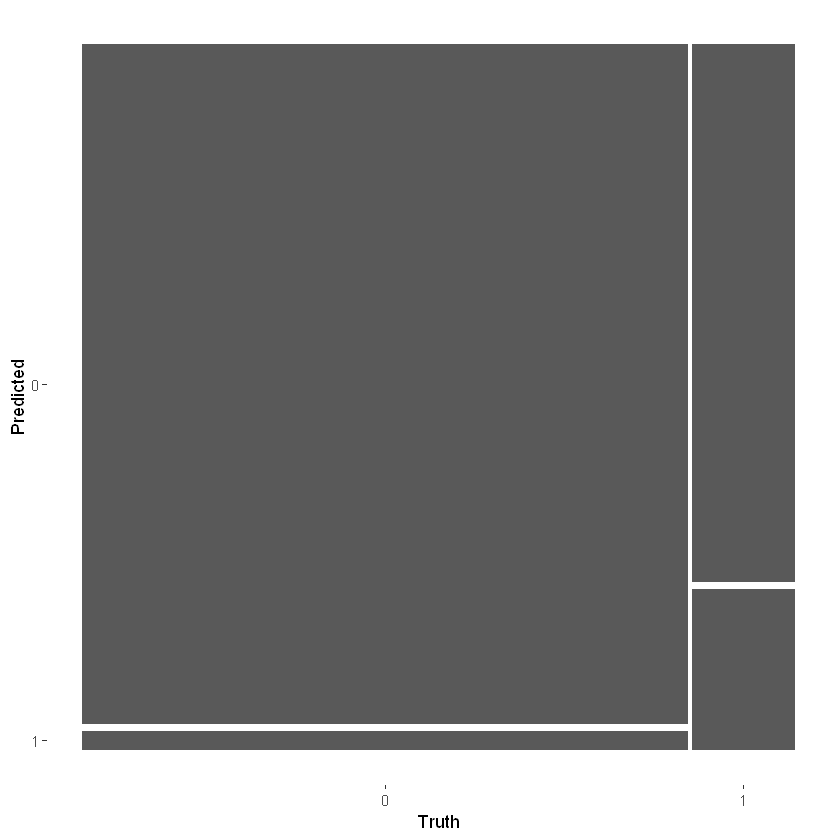

In [43]:
# Convert outcomes to a yardstick confusion matrix
confusion <- conf_mat(outcomes)

# Plot the confusion matrix
autoplot(confusion)



In [44]:
# Get performance metrics for the confusion matrix
summary(confusion)

.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
accuracy,binary,0.8645911
kap,binary,0.2707778
sens,binary,0.9727831
spec,binary,0.2293814
ppv,binary,0.8811133
npv,binary,0.5894040
mcc,binary,0.3084184
j_index,binary,0.2021646
bal_accuracy,binary,0.6010823


In [45]:
class(outcomes)

[1] "table"

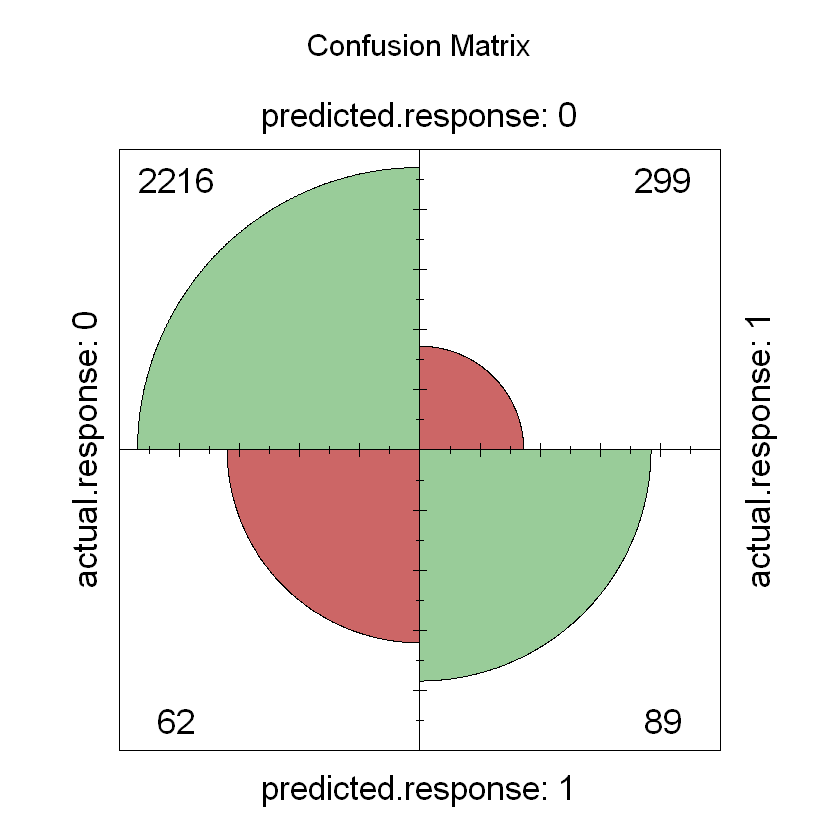

In [46]:
fourfoldplot(outcomes, color = c("#CC6666", "#99CC99"),
             conf.level = 0, margin = 1, main = "Confusion Matrix")

In [47]:
importance <- varImp(lr.model, scale=FALSE)

importance %>%
  arrange(desc(Overall))

# plot importance
#plot(importance)

,Overall
,<dbl>
International.planYes,13.209934
Customer.service.calls,11.529866
Total.day.charge,10.414399
Voice.mail.planYes,5.581354
Total.intl.charge,4.450904
Total.eve.charge,4.404143
Total.intl.calls,4.136070
Total.night.charge,2.214102


In [48]:
# create prediction object for ROCR curve
pr <- prediction(predicted.response, actual.response)

pr

A prediction instance
  with 2666 data points

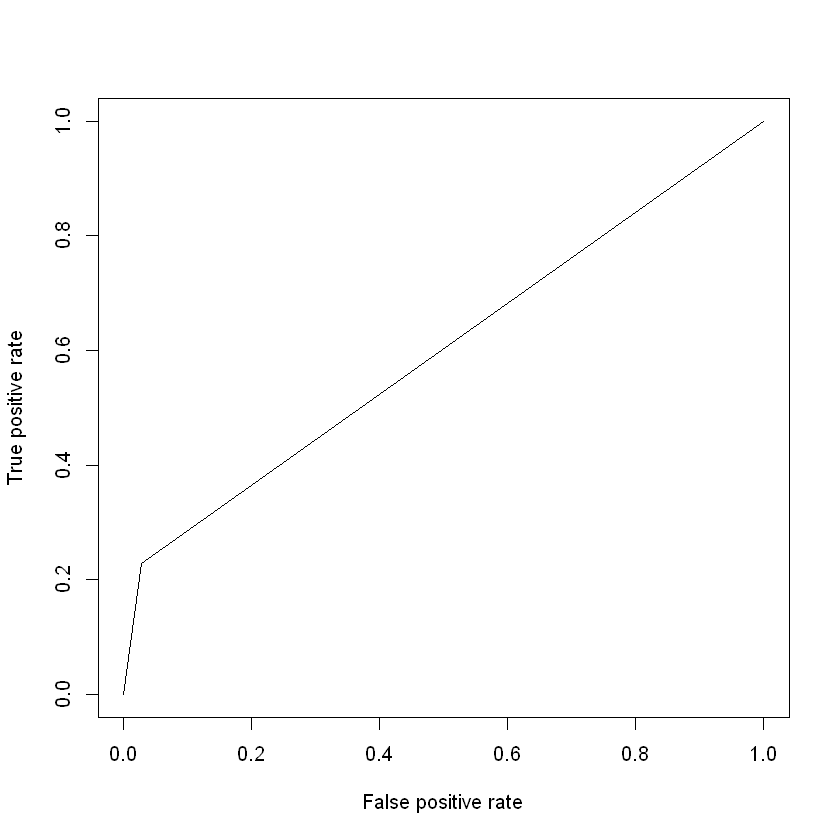

In [49]:
# plotting ROC curve
prf <- performance(pr, measure = "tpr", x.measure = "fpr")
plot(prf)

In [50]:
# predict on test set

In [51]:
# read training dataset
churn.test <- read.csv('churn-bigml-20.csv')

head(churn.test)

,State,Account.length,Area.code,International.plan,Voice.mail.plan,Number.vmail.messages,Total.day.minutes,Total.day.calls,Total.day.charge,Total.eve.minutes,Total.eve.calls,Total.eve.charge,Total.night.minutes,Total.night.calls,Total.night.charge,Total.intl.minutes,Total.intl.calls,Total.intl.charge,Customer.service.calls,Churn
,<chr>,<int>,<int>,<chr>,<chr>,<int>,<dbl>,<int>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<int>,<dbl>,<int>,<lgl>
1,LA,117,408,No,No,0,184.5,97,31.37,351.6,80,29.89,215.8,90,9.71,8.7,4,2.35,1,FALSE
2,IN,65,415,No,No,0,129.1,137,21.95,228.5,83,19.42,208.8,111,9.40,12.7,6,3.43,4,TRUE
3,NY,161,415,No,No,0,332.9,67,56.59,317.8,97,27.01,160.6,128,7.23,5.4,9,1.46,4,TRUE
4,SC,111,415,No,No,0,110.4,103,18.77,137.3,102,11.67,189.6,105,8.53,7.7,6,2.08,2,FALSE
5,HI,49,510,No,No,0,119.3,117,20.28,215.1,109,18.28,178.7,90,8.04,11.1,1,3.00,1,FALSE
6,AK,36,408,No,Yes,30,146.3,128,24.87,162.5,80,13.81,129.3,109,5.82,14.5,6,3.92,0,FALSE


In [52]:
churn.test$Has.churned <-case_when(churn.test$Churn==TRUE~1,
                      churn.test$Churn==FALSE~0)

# Get the actual responses from the dataset
actual.response.test <- churn.test$Has.churned

predicted.response.test <- predict(lr.model, newdata = churn.test, type = "response")
# convert percentage to 1 or 0
predicted.classes.test <- ifelse(predicted.response.test > 0.5, 1, 0)



In [53]:
outcomes.test <- table(predicted.classes.test, actual.response.test)

outcomes.test

                      actual.response.test
predicted.classes.test   0   1
                     0 552  78
                     1  20  17

.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
accuracy,binary,0.8530735
kap,binary,0.1931518
sens,binary,0.9650350
spec,binary,0.1789474
ppv,binary,0.8761905
npv,binary,0.4594595
mcc,binary,0.2198355
j_index,binary,0.1439823
bal_accuracy,binary,0.5719912


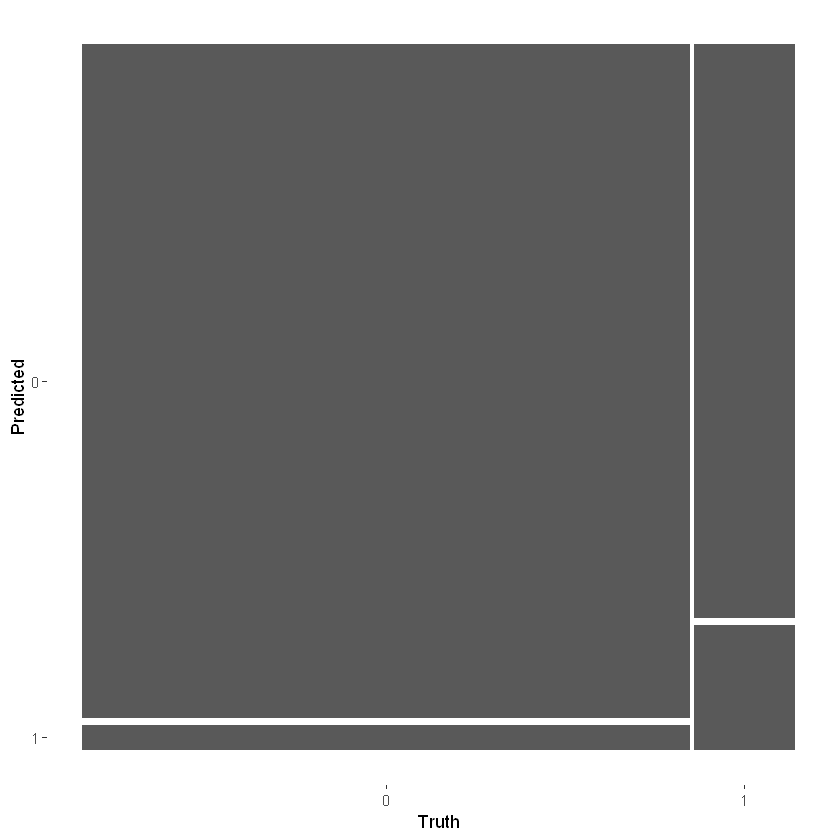

In [54]:
# Convert outcomes to a yardstick confusion matrix
confusion.test <- conf_mat(outcomes.test)

# Plot the confusion matrix
autoplot(confusion.test)

# Get performance metrics for the confusion matrix
summary(confusion.test)

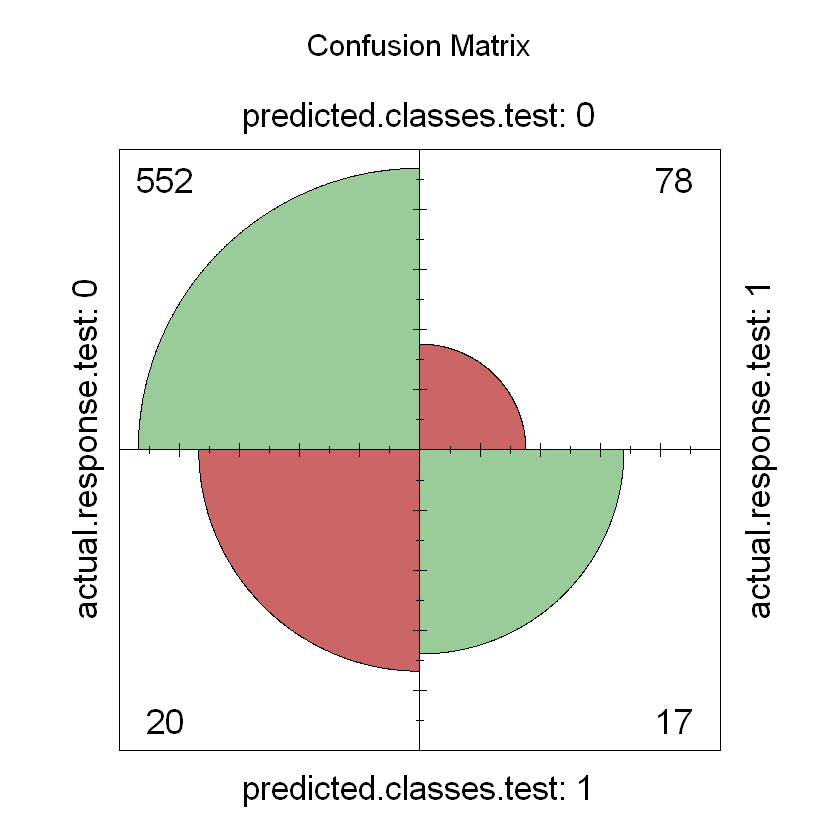

In [55]:
fourfoldplot(outcomes.test, color = c("#CC6666", "#99CC99"),
             conf.level = 0, margin = 1, main = "Confusion Matrix")

In [56]:
library(ROCR)

# create prediction object for ROCR curve
pr <- prediction(predicted.classes.test, actual.response.test)

pr

A prediction instance
  with 667 data points

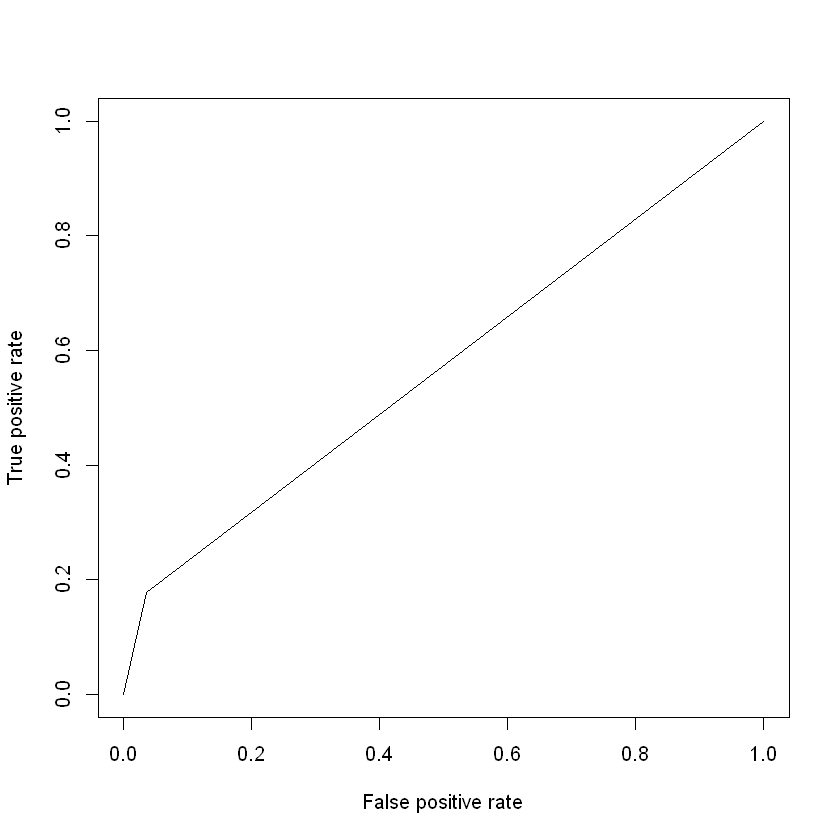

In [57]:
# plotting ROC curve
prf <- performance(pr, measure = "tpr", x.measure = "fpr")
plot(prf)

In [58]:
# AUC value
auc <- performance(pr, measure = "auc")
auc <- auc@y.values[[1]]
auc

[1] 0.5719912

In [59]:
# Make a data frame of predicted probabilities for the test data
prediction.data.test <- churn.test %>% 
  mutate(   
    Churn.rate = predict(
      lr.model, 
      churn.test, 
      type = "response"
    )
  )

head(prediction.data.test)

,State,Account.length,Area.code,International.plan,Voice.mail.plan,Number.vmail.messages,Total.day.minutes,Total.day.calls,Total.day.charge,Total.eve.minutes,⋯,Total.night.minutes,Total.night.calls,Total.night.charge,Total.intl.minutes,Total.intl.calls,Total.intl.charge,Customer.service.calls,Churn,Has.churned,Churn.rate
,<chr>,<int>,<int>,<chr>,<chr>,<int>,<dbl>,<int>,<dbl>,<dbl>,⋯,<dbl>,<int>,<dbl>,<dbl>,<int>,<dbl>,<int>,<lgl>,<dbl>,<dbl>
1,LA,117,408,No,No,0,184.5,97,31.37,351.6,⋯,215.8,90,9.71,8.7,4,2.35,1,FALSE,0,0.15525242
2,IN,65,415,No,No,0,129.1,137,21.95,228.5,⋯,208.8,111,9.40,12.7,6,3.43,4,TRUE,1,0.19513258
3,NY,161,415,No,No,0,332.9,67,56.59,317.8,⋯,160.6,128,7.23,5.4,9,1.46,4,TRUE,1,0.60764618
4,SC,111,415,No,No,0,110.4,103,18.77,137.3,⋯,189.6,105,8.53,7.7,6,2.08,2,FALSE,0,0.02331714
5,HI,49,510,No,No,0,119.3,117,20.28,215.1,⋯,178.7,90,8.04,11.1,1,3.00,1,FALSE,0,0.05810072
6,AK,36,408,No,Yes,30,146.3,128,24.87,162.5,⋯,129.3,109,5.82,14.5,6,3.92,0,FALSE,0,0.01069088


`geom_smooth()` using formula 'y ~ x'

Warning message in eval(family$initialize):
"non-integer #successes in a binomial glm!"
Warning message in eval(family$initialize):
"non-integer #successes in a binomial glm!"


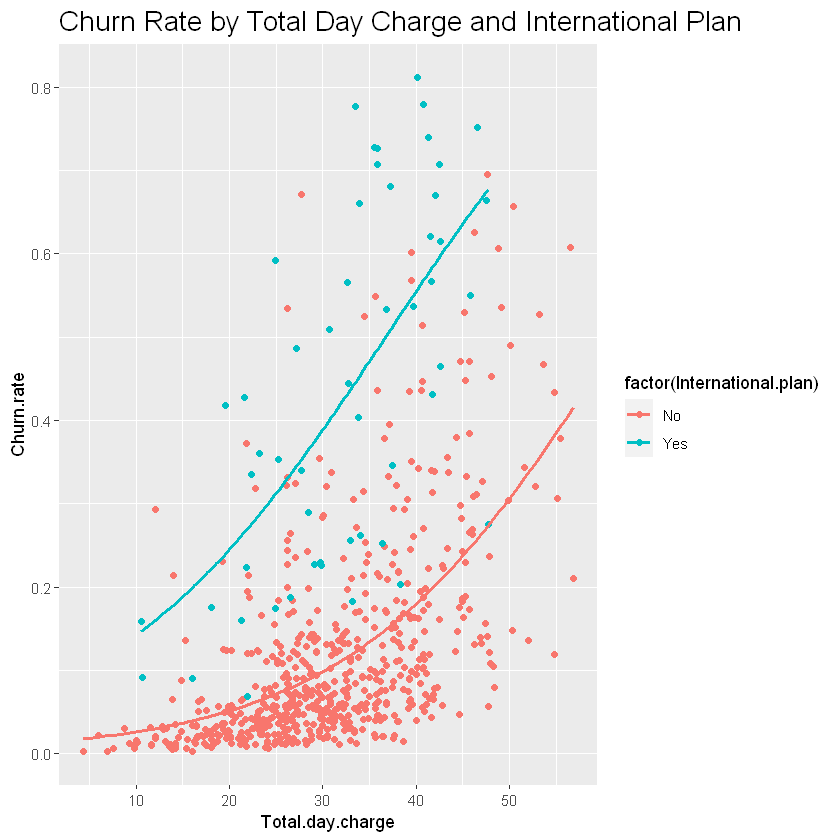

In [155]:
ggplot(prediction.data.test, aes(Total.day.charge, Churn.rate, 
                                 color=factor(International.plan))) + 
  geom_point() +
  ggtitle('Churn Rate by Total Day Charge and International Plan') +
  theme(plot.title = element_text(size=17)) +
  geom_smooth(method = "glm", 
    se = FALSE, 
    method.args = list(family = binomial)
  )

# note churn rate of international plan == Yes much higher


`geom_smooth()` using formula 'y ~ x'

Warning message in eval(family$initialize):
"non-integer #successes in a binomial glm!"
Warning message in eval(family$initialize):
"non-integer #successes in a binomial glm!"


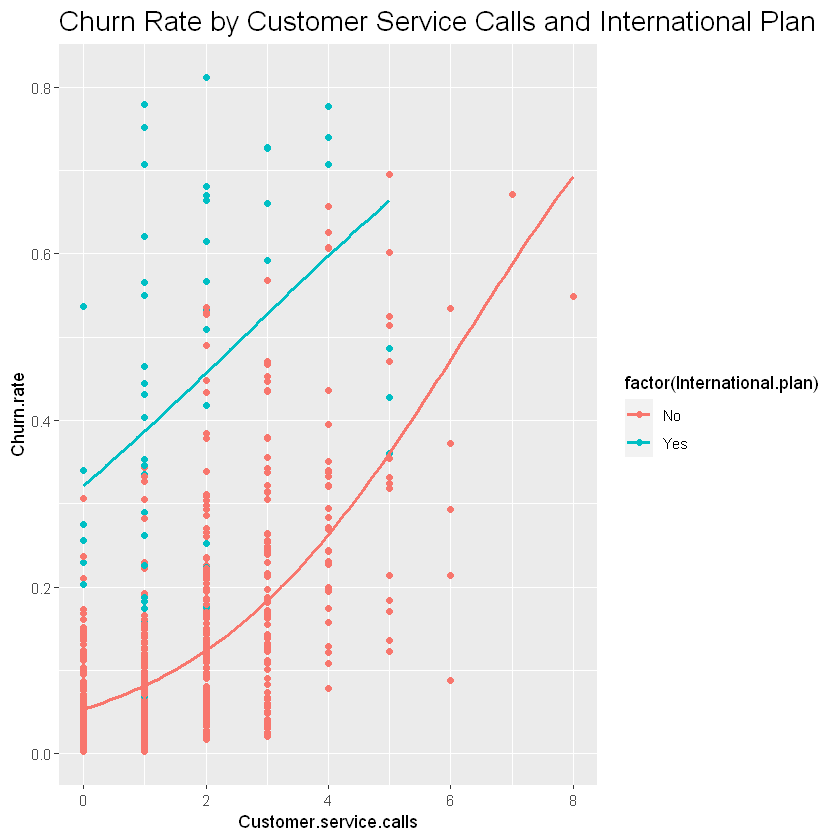

In [154]:
ggplot(prediction.data.test, aes(Customer.service.calls, Churn.rate, 
                                 color=factor(International.plan))) + 
  geom_point() +
  ggtitle('Churn Rate by Customer Service Calls and International Plan') +
  theme(plot.title = element_text(size=17)) +
  geom_smooth(method = "glm", 
    se = FALSE, 
    method.args = list(family = binomial)
  )



`geom_smooth()` using formula 'y ~ x'

Warning message in eval(family$initialize):
"non-integer #successes in a binomial glm!"
Warning message in eval(family$initialize):
"non-integer #successes in a binomial glm!"
Warning message in eval(family$initialize):
"non-integer #successes in a binomial glm!"
Warning message in eval(family$initialize):
"non-integer #successes in a binomial glm!"
Warning message in eval(family$initialize):
"non-integer #successes in a binomial glm!"
Warning message in eval(family$initialize):
"non-integer #successes in a binomial glm!"
Warning message in eval(family$initialize):
"non-integer #successes in a binomial glm!"


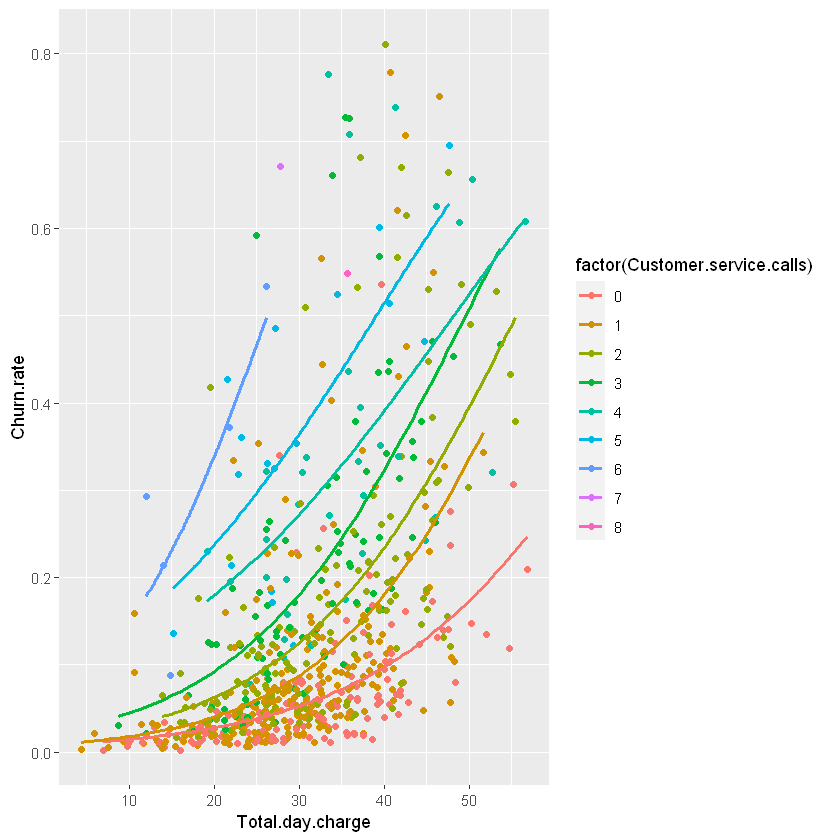

In [62]:
ggplot(prediction.data.test, aes(Total.day.charge, Churn.rate, 
                                 color=factor(Customer.service.calls))) + 
  geom_point() +
  geom_smooth(method = "glm", 
    se = FALSE, 
    method.args = list(family = binomial)
  )

